### Question 1

* Use the approach described in Chapter 6.5.1 of Introduction to Statistical Learning to select the best subset of explanatory variables to predict richness in the RIKZ dataset
  * Note that the approach uses cross-validation
  * You do not need to include interaction, 

In [ ]:
### Write you code here - use rick data set
# how to select best supset? USE cross-validation
# select model that has one parameter and compute r^2, select another model and computer its r^2 etc. 
# so you can find the best subset that predicts what you are interested in - here is richness

#repeat k iteration for the each replication of selecting one chunk for testing - this has more steps 

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [16]:
#load data into variable as a tibble
survey_data = read_csv("RIKZ.csv")
head(survey_data)

Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.



Sample,C1,P1,P2,P3,P4,P5,P6,P7,P8,...,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach
1,4,0,0,0,0,0,1,0,0,...,10,29.4,17.5,0.045,253.9,222.5,0.05,2.05,69.830,1
2,0,0,1,0,0,0,0,0,0,...,10,29.4,17.5,-1.036,226.9,200.0,0.30,2.50,59.000,1
3,0,0,3,0,0,0,0,0,0,...,10,29.4,17.5,-1.336,237.1,194.5,0.10,3.45,59.220,1
4,0,0,0,0,0,0,0,0,0,...,10,29.4,17.5,0.616,248.6,221.0,0.15,1.60,67.750,1
5,1,0,0,0,0,0,0,0,0,...,10,29.4,17.5,-0.684,251.9,202.0,0.05,2.45,57.760,1
6,0,0,0,0,0,1,0,0,0,...,8,29.6,20.8,1.190,250.1,192.5,0.10,2.50,53.075,2


In [30]:
#compute richness of cols w/ spp (2-76) & samples (rows 1-45) using apply to rows (marg=1) & sum fun (get # cols w/ values>0)
richness = (survey_data[1:45,2:76]>0) %>% apply(1, sum)
richness

#add richness column to survey data tibble 
survey_data["richness"] = richness
survey_data

[1] 11 10 13 11 10  8  9  8 19 17  6  1  4  3  3  1  3  3  1  4  3 22  6  0  6
[26]  5  4  1  6  4  2  1  1  3  4  3  5  7  5  0  7 11  3  0  2

Sample,C1,P1,P2,P3,P4,P5,P6,P7,P8,...,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach,richness
1,4,0,0,0,0,0,1,0,0,...,29.4,17.500,0.045,253.9,222.5,0.0500,2.05,69.8300,1,11
2,0,0,1,0,0,0,0,0,0,...,29.4,17.500,-1.036,226.9,200.0,0.3000,2.50,59.0000,1,10
3,0,0,3,0,0,0,0,0,0,...,29.4,17.500,-1.336,237.1,194.5,0.1000,3.45,59.2200,1,13
4,0,0,0,0,0,0,0,0,0,...,29.4,17.500,0.616,248.6,221.0,0.1500,1.60,67.7500,1,11
5,1,0,0,0,0,0,0,0,0,...,29.4,17.500,-0.684,251.9,202.0,0.0500,2.45,57.7600,1,10
6,0,0,0,0,0,1,0,0,0,...,29.6,20.800,1.190,250.1,192.5,0.1000,2.50,53.0750,2,8
7,0,0,0,1,1,0,0,0,0,...,29.6,20.800,0.820,257.1,205.5,0.1000,1.85,54.4100,2,9
8,0,0,0,0,0,0,0,0,0,...,29.6,20.800,0.635,247.9,211.5,0.1000,1.70,60.4050,2,8
9,0,0,0,21,11,3,0,34,0,...,29.6,20.800,0.061,248.9,205.5,0.1500,2.30,58.8100,2,19
10,0,2,0,2,0,0,0,7,0,...,29.6,20.800,-1.334,257.9,197.0,0.0000,2.60,59.5750,2,17


In [31]:
#verify that there are no missing richness values
dim(survey_data)
sum(is.na(survey_data$richness))

[1] 45 90

[1] 0

In [32]:
#create variable containing no columns with species 
survey_data_richness = survey_data[, 77:90]
head(survey_data_richness)

week,angle1,angle2,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach,richness
1,32,96,10,29.4,17.5,0.045,253.9,222.5,0.05,2.05,69.830,1,11
1,62,96,10,29.4,17.5,-1.036,226.9,200.0,0.30,2.50,59.000,1,10
1,65,96,10,29.4,17.5,-1.336,237.1,194.5,0.10,3.45,59.220,1,13
1,55,96,10,29.4,17.5,0.616,248.6,221.0,0.15,1.60,67.750,1,11
1,23,96,10,29.4,17.5,-0.684,251.9,202.0,0.05,2.45,57.760,1,10
1,129,89,8,29.6,20.8,1.190,250.1,192.5,0.10,2.50,53.075,2,8


# Best subset selection using regsubset() function 

In [35]:
 library(leaps)

Assess which of the 13 variables is the best predicter of species richness

Use regsubset() to identify best model that contains a given # of predictors, where best is quantified using RSS.

In [38]:
#summary() command outputs best set of variables for each model size 
# by default, regsubsets() only reports results up to best 8-variable model -> use nvmax  to return total variables desired = 13

regfit.full <- regsubsets(richness ~., data = survey_data_richness, nvmax = 13)
reg.summary <- summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(richness ~ ., data = survey_data_richness, 
    nvmax = 13)
13 Variables  (and intercept)
              Forced in Forced out
week              FALSE      FALSE
angle1            FALSE      FALSE
angle2            FALSE      FALSE
exposure          FALSE      FALSE
salinity          FALSE      FALSE
temperature       FALSE      FALSE
NAP               FALSE      FALSE
penetrability     FALSE      FALSE
grainsize         FALSE      FALSE
humus             FALSE      FALSE
chalk             FALSE      FALSE
sorting1          FALSE      FALSE
Beach             FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          week angle1 angle2 exposure salinity temperature NAP penetrability
1  ( 1 )  " "  " "    " "    "*"      " "      " "         " " " "          
2  ( 1 )  " "  " "    " "    "*"      " "      " "         "*" " "          
3  ( 1 )  " "  " "    " "    "*"      "*"      " "         "*" " "          

^asterisk indicates given variable is included in corresponding model 
 
defaul regsubsets() w/o nvmax ->  best 2-variable model contains exposure & NAP
w/ nvmax -> best 2-variable model contains exposure & NAP (or is it NAP & chalk?)

In [39]:
#summary() also returns R^2, RSS, adjusted R^2, Cp & BIC 
# -> examine these to try to select best overall model

names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [40]:
#R^2 increases from 34% when only 1 variable is included in model to 72% when all variables included 
    # -> as expected, R^2 increases as more variables are included

reg.summary$rsq

[1] 0.3396289 0.6321333 0.6792648 0.6875366 0.6904720 0.7029031 0.7084642
 [8] 0.7165852 0.7222456 0.7224675 0.7225468 0.7225745 0.7225881

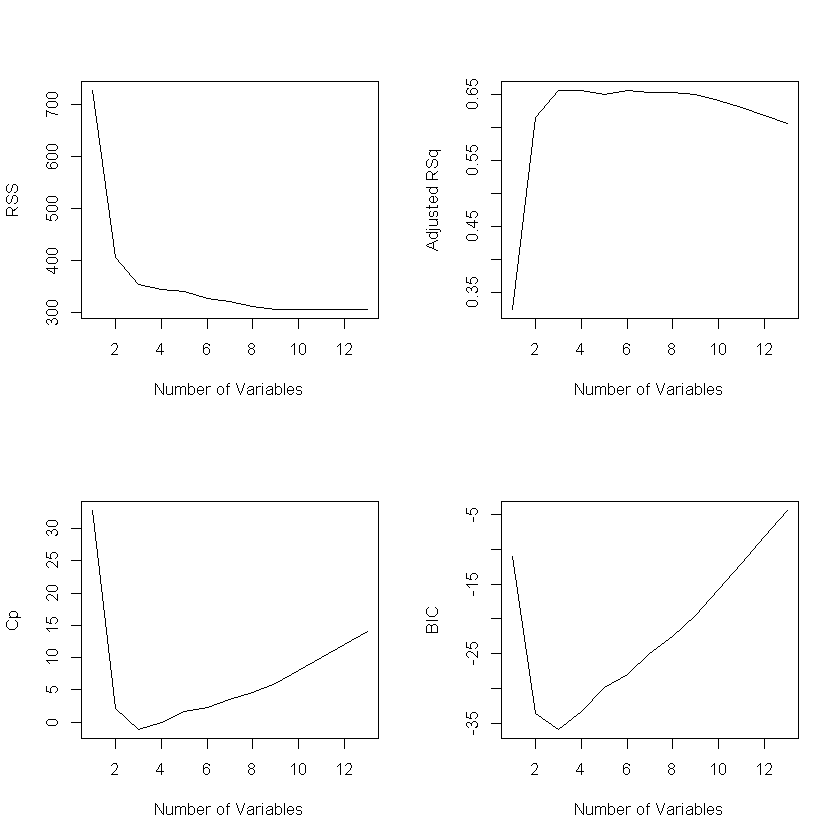

In [70]:
# Plot RSS, adjusted R^2, Cp & BIC for all of the models at once -> will help decide which model to select
# type = "1"  tells R to connect the plotted points with lines

par(mfrow = c(2, 2))

##RSS
plot(reg.summary$rss , xlab = "Number of Variables", ylab = "RSS", type = "l")

##ajusted R^2
plot(reg.summary$adjr2 , xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")

##Cp
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")

##BIC
plot(reg.summary$bic , xlab = "Number of Variables", ylab = "BIC", type = "l")

#RSS -> clear line max at 1 & line min at 13 
#ajusted R^2 -> not clear what max vector pt is so must caculate
#Cp and BIC -> not clear what min vector pt is so must calculate

[1] 4

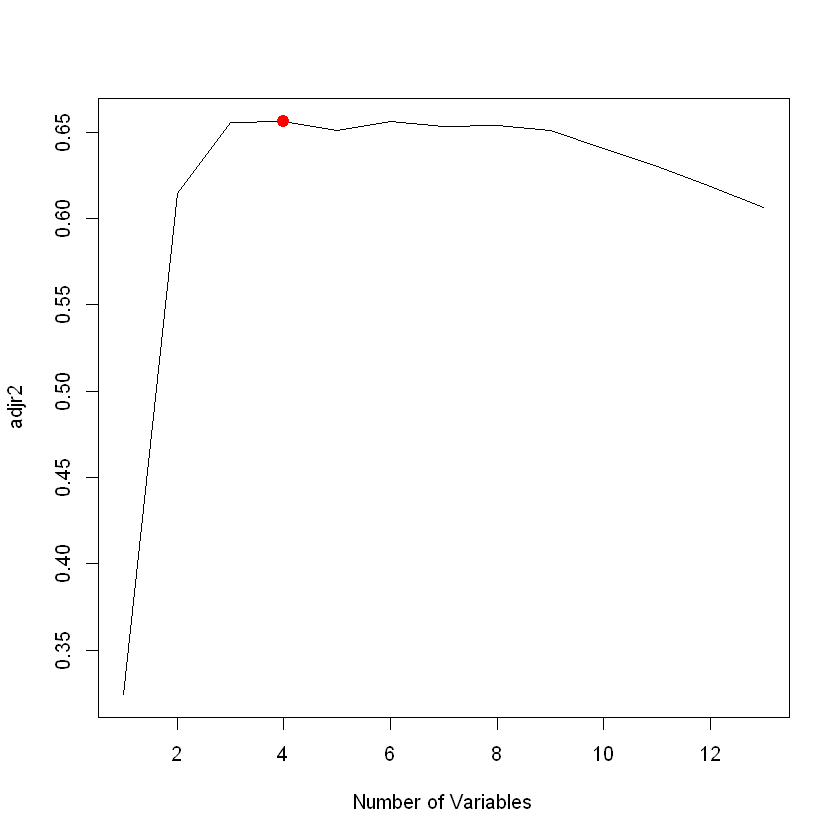

In [69]:
##Ajusted R^2
which.max (reg.summary$adjr2)
    #which.max() identifies location of max point of a vector

plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "adjr2", type = "l")
    
points (4, reg.summary$adjr2 [4] , col = "red", cex = 2, pch = 20)
    #points() puts points on plot that has already been created vs creating a new plot

[1] 3

[1] 3

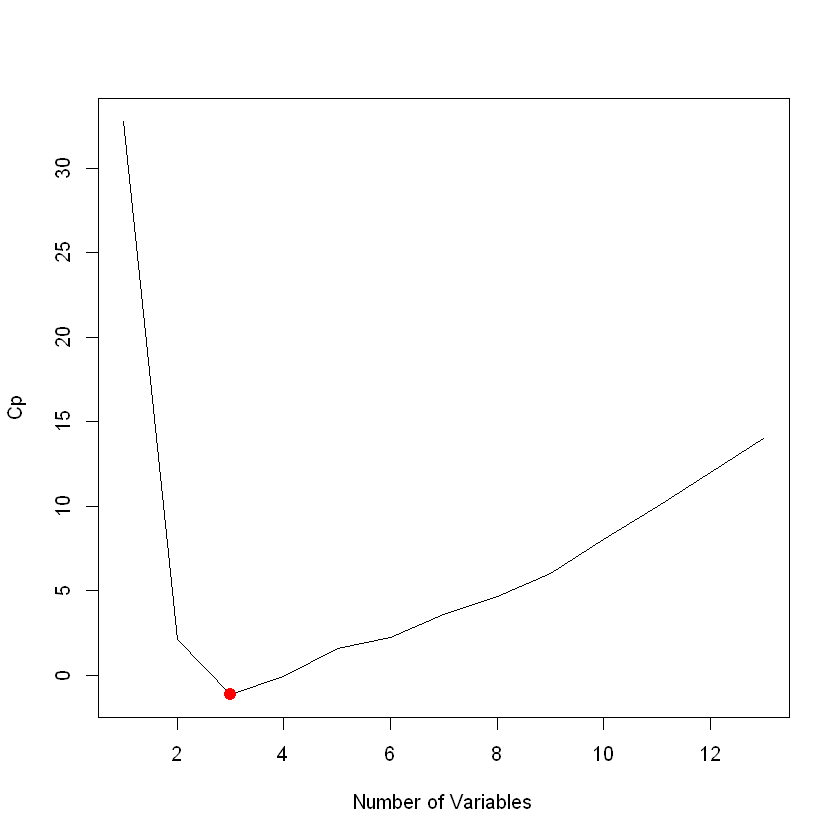

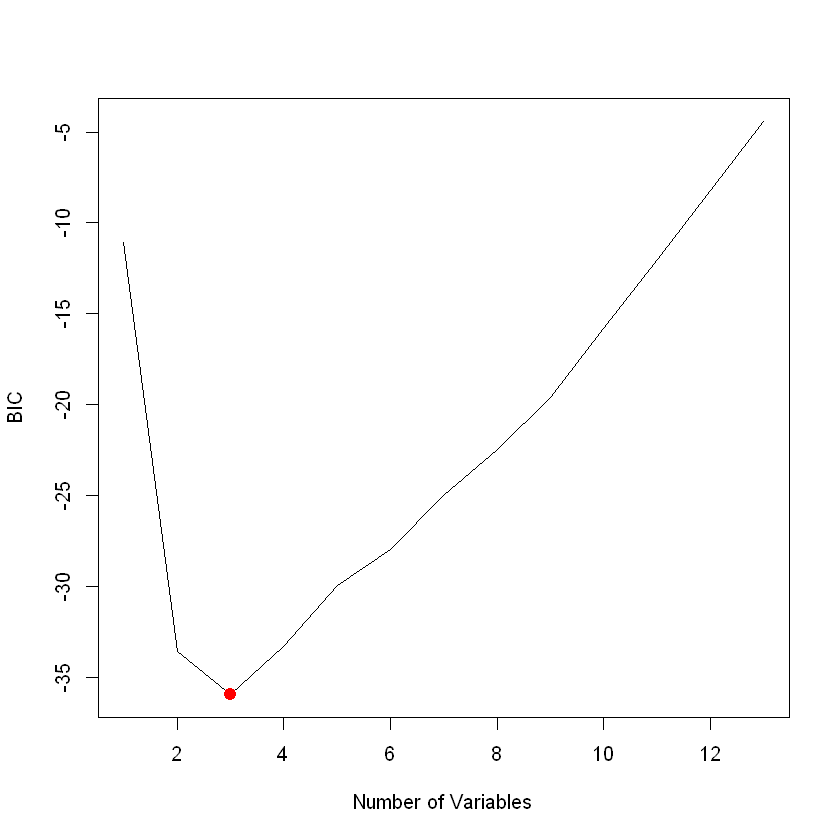

In [71]:
##Cp
which.min(reg.summary$cp) 
    #which.min() indicates models with smallest statistics
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
    points (3, reg.summary$cp[3] , col = "red", cex = 2, pch = 20)

##BIC
which.min(reg.summary$bic)

plot(reg.summary$bic , xlab = "Number of Variables", ylab = "BIC", type = "l")
    points (3, reg.summary$bic [3], col = "red", cex = 2, pch = 20)

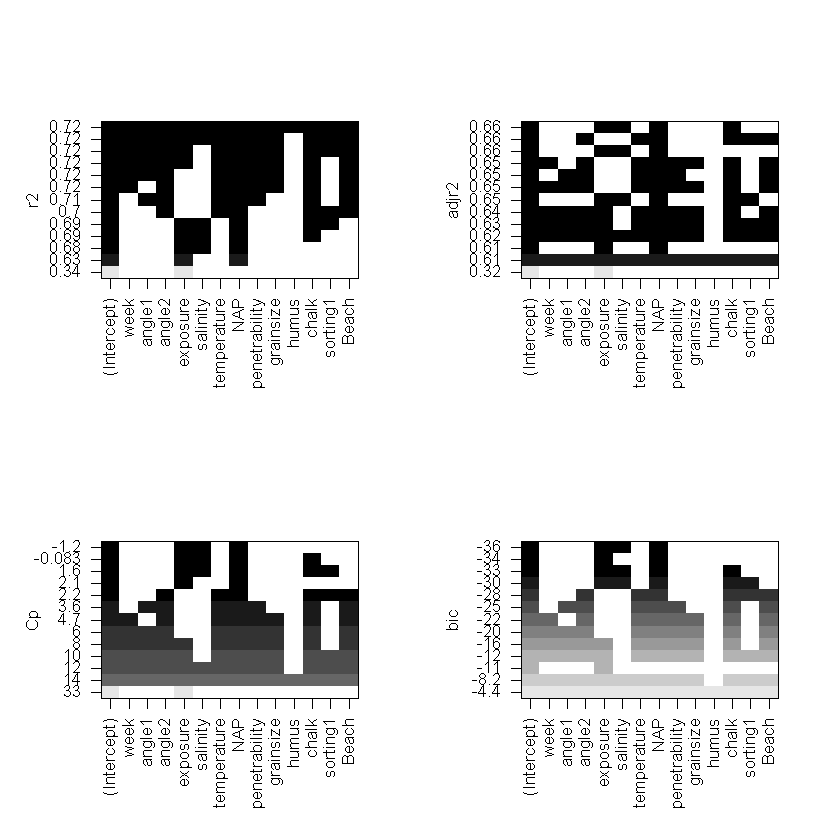

In [73]:
#regsubsets() has built-in plot() command -> use to display selected variables for best model with given # predictors
    #ranked by BIC, Cp, adjusted R^2 or AIC

par(mfrow = c(2, 2))

plot(regfit.full , scale = "r2")
plot(regfit.full , scale = "adjr2")
plot(regfit.full , scale = "Cp")
plot(regfit.full , scale = "bic")

#top row each plot contains black square for each variable selected according to optimal model associated with that statistic

#NOT QUITE SURE HOW TO INTERPRET THESE PLOTS IN TERMS OF HOW MANY MODELS SHARE A SIMILAR R^2/ADJR2/CP/BIC
# AND WHAT MODEL HAS THE LOWEST/HIGHEST R^2/ADJR2/CP/BIC

In [76]:
#coef() to see the coefficient estimates associated with particular model of interest

#HOW CAN TO TELL IF THIS IS FOR BIC OR CP AS BOTH HAVE MIN PT = 3
coef(regfit.full, 3)

(Intercept)    exposure    salinity         NAP 
   0.574551   -2.320101    1.058035   -2.588074

## Choosing among models using Validation-Set approach & Cross-Validation

for these approaches to yield accurate test error estimates -> use only training observations to perform all aspects of model-fitting (incl. variable selection).
    -> if full data set were used to perform best subset selection step, then validation set errors and cross-validation errors obtained would not be accurate test error estimates

how to use validation set approach:
1. split observations into a training set and a test set by creating a random vector (train) of elements equal to TRUE if corresponding observation is in the training set & FALSE otherwise
2. vector test has a TRUE if observation is in test set & a FALSE otherwise

! in command to create test causes TRUEs to switch to FALSEs and vice versa 

In [77]:
set.seed(1)
train <- sample(c(TRUE,FALSE), nrow(survey_data_richness), replace=TRUE)
test <- (!train)

In [78]:
#apply regsubsets() to training set in order to perform best subset selection
regfit.best <- regsubsets(richness ~., 
    data = survey_data_richness[train, ], nvmax = 13)

#^subset richness data directly in the call in order to access only the training data susbset using expression 
    #survey_data_richness[train, ]

In [79]:
#compute validation set error for best model of each model size
# 1. make a model matrix for the test data

test.mat <- model.matrix(richness ~., data = survey_data_richness[test, ])
    #model.matrix() uses for building an "X"  matrix from data

In [81]:
# 2. run a loop, and for each size i, extract coefficients from regfit.best for the best model of that size, multiply them 
    #into appropriate columns of the test model matrix to form predictions and compute test MSE

val.errors <- rep(NA, 13)
for (i in 1:13) {
 coefi <- coef(regfit.best , id = i)
 pred <- test.mat[, names(coefi)] %*% coefi
 val.errors[i] <- mean((survey_data_richness$richness[test] - pred)^2)
}

val.errors

[1] 18.857606 11.263173  5.908526 16.222727 15.203819 12.238642 22.924678
 [8] 21.932974 33.453819 34.375640 43.489042 41.046507 38.951389

In [82]:
# 3. find how many variables best model contains 
which.min(val.errors)

[1] 3

In [83]:
coef(regfit.best, 3)

(Intercept)    exposure    salinity         NAP 
 -16.711996   -1.510040    1.366298   -2.635254

In [84]:
# 4. as there is no predict() method for regsubsets() -> must write function that captures steps above to write my own 
    #predict method

predict.regsubsets <- function(object, newdata, id, ...) {
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coefi <- coef(object, id=id)
    xvars <- names(coefi)
    mat[, xvars] %*% coefi
}

In [85]:
# 5. perform best subset selection on full data set and select best 3-variable model
# must use full data set in order to obtain more accurate coefficient estimates
regfit.best <- regsubsets(richness~., data=survey_data_richness, nvmax=13)
coef(regfit.best, 3)

#^note: perform best subset selection on full data set and select best 3-variable model rather than simply using varibales 
    #obtained from training set b/c best 3-var model on full data set may differ from corresponding model on training set

(Intercept)    exposure    salinity         NAP 
   0.574551   -2.320101    1.058035   -2.588074

In [86]:
#^from above, see best 3-var model on full data set has different variable set than best 3-var model on training set
# 6. choose among models of diff sizes using cross-validation 
    # must perform best subset selection w/in each k training sets:
        # a. create a vector that allocates each observation to one of k = 10 folds
        # b. create a matrix in which the results will be stored

k <- 10
n <- nrow(survey_data_richness)
set.seed(1)
folds <- sample(rep(1:k, length = n))
cv.errors <- matrix(NA, k, 13,
    dimnames = list(NULL, paste(1:13)))

In [91]:
        # c. write a for loop that perfoms cross-validation
# in the jth fold - elements of folds that equal j are in the test set & remainder are in training set
# make predictions for each model size (using new predit() method) & compute test errors on appropriate subset & store in 
    #appropriate slot in matrix cv.errors

# note: R automatically uses predict.regsubsets() fucntion when predict() is called b/c best.fit object has class regsubsets

for (j in 1:k) {
    best.fit <- regsubsets(richness~ .,
        data = survey_data_richness[folds != j, ],
        nvmax = 13)
    for (i in 1:13) {
        pred <- predict(best.fit , survey_data_richness[folds == j, ], id = i)
        cv.errors [j, i] <-
        mean (( survey_data_richness$richness[folds == j] - pred)^2)
     }
 }

best.fit

pred

#gives 10x13 matrix of which (j, i)th element corresponds to test MSE for the jth cross-validation fold for the best 
    # i-variable model


# AM I INTERPRETING THE RESULT MATRIX CORRECTLY AS 10 X 13? -> OR IS IT 4 X 13 OR 3 X 13?

Subset selection object
Call: regsubsets.formula(richness ~ ., data = survey_data_richness[folds != 
    j, ], nvmax = 13)
13 Variables  (and intercept)
              Forced in Forced out
week              FALSE      FALSE
angle1            FALSE      FALSE
angle2            FALSE      FALSE
exposure          FALSE      FALSE
salinity          FALSE      FALSE
temperature       FALSE      FALSE
NAP               FALSE      FALSE
penetrability     FALSE      FALSE
grainsize         FALSE      FALSE
humus             FALSE      FALSE
chalk             FALSE      FALSE
sorting1          FALSE      FALSE
Beach             FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive

6.527018
3.396329
7.541250
5.719778


In [88]:
#use apply() to average over columns of matrix in order to obtain vector for which the ith element is the cross-validation error
    # for the i-variable model

mean.cv.errors <- apply(cv.errors, 2, mean)
mean.cv.errors

1         2         3         4         5         6         7         8 
21.194419  9.356904  9.987575 10.475829 11.714871 11.607889 11.831516 11.036036 
        9        10        11        12        13 
10.051256 10.385415 10.747278 10.962712 10.978410

In [96]:
#^ cross-validation selects a 10-variable model

reg.best <- regsubsets(richness ~., data=survey_data_richness,
    nvmax = 13)
    coef(reg.best, 10)

(Intercept)          week        angle1        angle2      exposure 
-24.196069599   1.451750747  -0.008747078   0.078745551  -0.275227445 
  temperature           NAP penetrability     grainsize         chalk 
  1.566897940  -2.711544963  -0.009042438   0.018220664  -0.115248301 
        Beach 
 -0.940811982